# 📋 Cardio Project

In [1392]:
#Let's import libraries
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from sklearn.metrics import f1_score , accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
from imblearn.ensemble import BalancedRandomForestClassifier
import xgboost as xgb

In [1393]:
#Firstly , let's  ignore warnings
warnings.filterwarnings('ignore')

In [1394]:
#Let's import cardio dataset
df = pd.read_csv('cardio_train - cardio_train.csv')

In [1395]:
#Let's look at dataset
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# 📈 Descriptive analytics

In [1396]:
#Let's examine null values
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [1397]:
#Let's examine correlation cardio with other columns
df.corr()['cardio'][:-1]

id             0.003799
age            0.238159
gender         0.008109
height        -0.010821
weight         0.181660
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
alco          -0.007330
active        -0.035653
Name: cardio, dtype: float64

In [1398]:
#Let's look at descriptive analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [1399]:
#Let's examine dataset info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [1400]:
#Let's look at data types of columns 
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [1401]:
#Let's examine number of unique values for all columns
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [1402]:
#Let's examine value counts for all columns
for i in df.columns:
    print(f"{str(i).capitalize()}: ") 
    print(df[i].value_counts())
    print("=========================")

Id: 
0        1
66623    1
66631    1
66630    1
66628    1
        ..
33338    1
33339    1
33340    1
33341    1
99999    1
Name: id, Length: 70000, dtype: int64
Age: 
19741    32
18236    32
20376    31
18253    31
20442    31
         ..
19277     1
16493     1
20059     1
23659     1
17926     1
Name: age, Length: 8076, dtype: int64
Gender: 
1    45530
2    24470
Name: gender, dtype: int64
Height: 
165    5853
160    5022
170    4679
168    4399
164    3396
       ... 
112       1
98        1
74        1
119       1
57        1
Name: height, Length: 109, dtype: int64
Weight: 
65.0    3850
70.0    3764
68.0    2831
75.0    2740
60.0    2710
        ... 
92.2       1
75.6       1
82.9       1
23.0       1
99.9       1
Name: weight, Length: 287, dtype: int64
Ap_hi: 
 120     27699
 140      9506
 130      8961
 110      8644
 150      4450
         ...  
 1620        1
 199         1
-150         1
-115         1
 2000        1
Name: ap_hi, Length: 153, dtype: int64
Ap_lo: 
80     34

# ♻️ Let's convert the representation of variables

In [1403]:
#Let's convert the day to year in the age column
df["age"]=df["age"]/365

In [1404]:
#Let's convert 2 - Male to 1 and 1 - Female to 0 
df["gender"]=df["gender"].map({2:1,1:0})

# 🚫 Let's remove unnecessary variables

In [1405]:
#Let's examine cardinality
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [1406]:
#Let's remove id column becouse all values is unique
del df['id']

<Axes: >

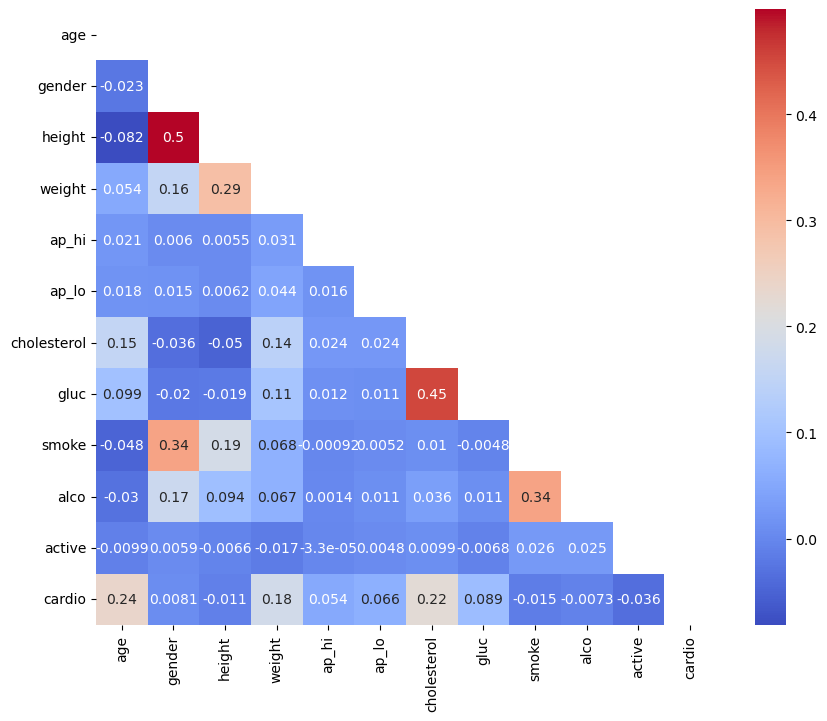

In [1025]:
#Let's consider the columns that are highly correlated with others
#Let's calculate the correlation matrix
correlation_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')

In [1407]:
#Let's find vif
#Independent value
columns = list(df.columns)

# Add a constant column to the dataframe
df_with_constant = sm.add_constant(df[columns])

# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = df_with_constant.columns
vif["VIF"] = [sm.OLS(df_with_constant[col], df_with_constant.drop(col, axis=1)).fit().rsquared for col in df_with_constant.columns]

In [1027]:
#Let's look at vif data frame
vif

,Variable,VIF
0,const,0.998397
1,age,0.076996
2,gender,0.314506
3,height,0.306579
4,weight,0.138269
5,ap_hi,0.003716
6,ap_lo,0.005815
7,cholesterol,0.251219
8,gluc,0.207477
9,smoke,0.198446


In [1028]:
#Let's examine null values
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# 🚫 Let's clean invalid values

In [1562]:
#Let's remove outlier
for i in ['height','weight','ap_hi','ap_lo','age']:
    mean = df[i].mean()
    std = df[i].std()
    below_outlier = mean - 3*std
    above_outlier = mean + 3*std
    df = df[(df[i]>=below_outlier) & (df[i]<=above_outlier)]

# ⚙️ Let's normalize the data set

In [1563]:
#Let's normalize columns of the data set 
for i in ['age', 'height', 'weight', 'ap_hi', 'ap_lo']:
    df[i] = (df[i]-df[i].min())/(df[i].max()-df[i].min())

# ⚠️ Let's limit it to logic

In [1564]:
#Let's limit ap_lo/ap_hi columns
df=df[(df["ap_hi"]<=300)&(df["ap_hi"]>=df["ap_lo"])&(df["ap_lo"]>0)]

# 🔎 Let's examine target value

In [1565]:
#Let's check the balance
df.cardio.value_counts()

0    34513
1    33541
Name: cardio, dtype: int64

In [1566]:
#Let's examine correlation cardio with other columns
df.corr()['cardio'][:-1]

age            0.242083
gender         0.006251
height        -0.016046
weight         0.178892
ap_hi          0.401005
ap_lo          0.328763
cholesterol    0.221068
gluc           0.088933
smoke         -0.017146
alco          -0.008338
active        -0.037659
Name: cardio, dtype: float64

In [1568]:
#Let's assign target and explanatory values
y = df['cardio']
X = df.drop('cardio',axis =1)

In [1567]:
df_s = df.copy()

# 🛠️ Modelling

In [1570]:
del df['gender']
del df['alco']

In [1541]:
#Let's create random forest classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42,max_depth = 7 , min_samples_leaf = 4)

In [1547]:
#Let's divide dataset test/train 
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 42 , test_size = 0.2) 

In [1548]:
#Let's fit train values
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=4, random_state=42)

In [1549]:
print("Accuracy Score (Train): ", accuracy_score(y_train,rf_classifier.predict(X_train)))
print("Accuracy Score (Test): ", accuracy_score(y_test,rf_classifier.predict(X_test)))
print("F1 Score: ", f1_score(y_test,rf_classifier.predict(X_test)))

Accuracy Score (Train):  0.7362011645206914
Accuracy Score (Test):  0.7317610756006171
F1 Score:  0.7078031212484994


# 📝 Adding Columns

In [1569]:
#Let's add columns which correlation is high with target value
for a in ['height','weight','ap_hi','ap_lo']:
    for b in ['height','weight','ap_hi','ap_lo']:
        if a > b:
            new_col_name = a + '/' + b
            df[new_col_name] = df[a] + df[b]
            corr = df[[new_col_name, 'cardio']].corr().loc[new_col_name, 'cardio']
            if np.abs(corr) < 0.25:
                del df[new_col_name]

In [1571]:
df

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active,cardio,ap_lo/ap_hi
0,0.436321,0.583333,0.352941,0.471869,0.223214,1,1,0,1,0,0.695084
1,0.630748,0.333333,0.623529,0.526316,0.238095,3,1,0,1,1,0.764411
2,0.485484,0.520833,0.376471,0.508167,0.208333,3,1,0,0,1,0.716500
3,0.354736,0.604167,0.588235,0.544465,0.252976,1,1,0,1,1,0.797441
4,0.338949,0.333333,0.282353,0.453721,0.193452,1,1,0,0,0,0.647173
...,...,...,...,...,...,...,...,...,...,...,...
69994,0.720386,0.520833,0.564706,0.544465,0.223214,1,1,0,1,1,0.767679
69995,0.526065,0.583333,0.517647,0.490018,0.223214,1,1,1,1,0,0.713232
69997,0.507629,0.895833,0.858824,0.598911,0.238095,3,1,0,0,1,0.837006
69998,0.864166,0.479167,0.470588,0.517241,0.223214,1,2,0,0,1,0.740456


In [1268]:
#Let's assign target and explanatory values
y = df['cardio']
X = df.drop('cardio',axis =1)

In [1269]:
#Let's divide dataset test/train 
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 42 , test_size = 0.2) 

In [1270]:
#Let's fit train values
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=4, random_state=42)

In [1271]:
print("Accuracy Score (Train): ", accuracy_score(y_train,rf_classifier.predict(X_train)))
print("Accuracy Score (Test): ", accuracy_score(y_test,rf_classifier.predict(X_test)))
print("F1 Score: ", f1_score(y_test,rf_classifier.predict(X_test)))

Accuracy Score (Train):  0.737
Accuracy Score (Test):  0.7377857142857143
F1 Score:  0.7229643045807863


# 📝 Logarithm

In [1552]:
#Let's find logarithm which correlation is high with target value
for a in ['height','weight','ap_hi','ap_lo']:
    new_col = a + "_log"
    df[new_col] = np.log1p(df[a])
    df[new_col] = df[new_col].replace(np.inf, 0)
    corr = df[[new_col, 'cardio']].corr().loc[new_col, 'cardio']
    if np.abs(corr) < 0.25:
        del df[new_col]

In [1553]:
df

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active,cardio,ap_lo/ap_hi,ap_hi_log,ap_lo_log
0,0.436321,0.583333,0.352941,0.471869,0.223214,1,1,0,1,0,0.695084,0.386533,0.201482
1,0.630748,0.333333,0.623529,0.526316,0.238095,3,1,0,1,1,0.764411,0.422857,0.213574
2,0.485484,0.520833,0.376471,0.508167,0.208333,3,1,0,0,1,0.716500,0.410895,0.189242
3,0.354736,0.604167,0.588235,0.544465,0.252976,1,1,0,1,1,0.797441,0.434677,0.225522
4,0.338949,0.333333,0.282353,0.453721,0.193452,1,1,0,0,0,0.647173,0.374126,0.176850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,0.720386,0.520833,0.564706,0.544465,0.223214,1,1,0,1,1,0.767679,0.434677,0.201482
69995,0.526065,0.583333,0.517647,0.490018,0.223214,1,1,1,1,0,0.713232,0.398788,0.201482
69997,0.507629,0.895833,0.858824,0.598911,0.238095,3,1,0,0,1,0.837006,0.469323,0.213574
69998,0.864166,0.479167,0.470588,0.517241,0.223214,1,2,0,0,1,0.740456,0.416894,0.201482


In [1479]:
df.corr()['cardio']

age            0.238159
height        -0.010821
weight         0.181660
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
active        -0.035653
cardio         1.000000
MAP            0.077640
Name: cardio, dtype: float64

In [1554]:
#Let's assign target and explanatory values
y = df['cardio']
X = df.drop('cardio',axis =1)

In [1481]:
#Let's divide dataset test/train 
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 42 , test_size = 0.2) 

In [1482]:
#Let's fit train values
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [1483]:
print("Accuracy Score (Train): ", accuracy_score(y_train,rf_classifier.predict(X_train)))
print("Accuracy Score (Test): ", accuracy_score(y_test,rf_classifier.predict(X_test)))
print("F1 Score: ", f1_score(y_test,rf_classifier.predict(X_test)))

Accuracy Score (Train):  0.7376071428571429
Accuracy Score (Test):  0.739
F1 Score:  0.722466960352423


# 📝 Square Root

In [1555]:
#Let's find square root which correlation is high with target value
for a in ['height','weight','ap_hi','ap_lo']:
    new_col = a +  "_power"
    df[new_col] = np.sqrt(df[a])
    corr = df[[new_col, 'cardio']].corr().loc[new_col, 'cardio']
    if np.abs(corr) < 0.10:
        del df[new_col]

In [1556]:
df

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active,cardio,ap_lo/ap_hi,ap_hi_log,ap_lo_log,weight_power,ap_hi_power,ap_lo_power
0,0.436321,0.583333,0.352941,0.471869,0.223214,1,1,0,1,0,0.695084,0.386533,0.201482,0.594089,0.686927,0.472456
1,0.630748,0.333333,0.623529,0.526316,0.238095,3,1,0,1,1,0.764411,0.422857,0.213574,0.789639,0.725476,0.487950
2,0.485484,0.520833,0.376471,0.508167,0.208333,3,1,0,0,1,0.716500,0.410895,0.189242,0.613572,0.712858,0.456435
3,0.354736,0.604167,0.588235,0.544465,0.252976,1,1,0,1,1,0.797441,0.434677,0.225522,0.766965,0.737878,0.502967
4,0.338949,0.333333,0.282353,0.453721,0.193452,1,1,0,0,0,0.647173,0.374126,0.176850,0.531369,0.673588,0.439832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,0.720386,0.520833,0.564706,0.544465,0.223214,1,1,0,1,1,0.767679,0.434677,0.201482,0.751469,0.737878,0.472456
69995,0.526065,0.583333,0.517647,0.490018,0.223214,1,1,1,1,0,0.713232,0.398788,0.201482,0.719477,0.700013,0.472456
69997,0.507629,0.895833,0.858824,0.598911,0.238095,3,1,0,0,1,0.837006,0.469323,0.213574,0.926727,0.773893,0.487950
69998,0.864166,0.479167,0.470588,0.517241,0.223214,1,2,0,0,1,0.740456,0.416894,0.201482,0.685994,0.719195,0.472456


In [1493]:
df.corr()['cardio']

age             0.238159
height         -0.010821
weight          0.181660
ap_hi           0.054475
ap_lo           0.065719
cholesterol     0.221147
gluc            0.089307
smoke          -0.015486
active         -0.035653
cardio          1.000000
MAP             0.077640
weight_power    0.183736
ap_hi_power     0.171726
ap_lo_power     0.115900
Name: cardio, dtype: float64

In [1494]:
#Let's assign target and explanatory values
y = df['cardio']
X = df.drop('cardio',axis =1)

In [1495]:
#Let's divide dataset test/train 
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 42 , test_size = 0.2) 

In [1496]:
#Let's fit train values
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [1497]:
print("Accuracy Score (Train): ", accuracy_score(y_train,rf_classifier.predict(X_train)))
print("Accuracy Score (Test): ", accuracy_score(y_test,rf_classifier.predict(X_test)))
print("F1 Score: ", f1_score(y_test,rf_classifier.predict(X_test)))

Accuracy Score (Train):  0.7340178571428572
Accuracy Score (Test):  0.736
F1 Score:  0.7179917594994658


# 📄 Threshold

In [1572]:
#Let's create train and test data frame
size = round(len(df)*0.8)
train = df[:size]
test = df[size:]

In [1573]:
train_y = train['cardio']
train_x = train.drop('cardio',axis = 1)

test_y = test['cardio']
test_x = test.drop('cardio',axis = 1)

In [1289]:
rf_classifier.fit(train_x, train_y)
PRED = rf_classifier.predict(test_x)            
PROB = rf_classifier.predict_proba(test_x)[:,1]

In [1290]:
test['PRED'] = PRED
test['PROB'] = PROB

In [1291]:
test['predict'] = test['PROB']>0.3

In [1292]:
test['predict'] = test['predict'].astype('int')

In [1293]:
print("F1 Score: ", f1_score(test_y,test['PRED']))
print("F1 Score: ", f1_score(test_y,test['predict']))

F1 Score:  0.7131122604198358
F1 Score:  0.7316051008800813


In [1294]:
f_score_max = 0
f_score_th = 0
for i in np.arange(1,9,0.1):
    i = round(i,1)/10
    test['predict'] = test['PROB']>i
    test['predict'] = test['predict'].astype('int')
    f_score = f1_score(test_y,test['predict'])
    if f_score > f_score_max:
        f_score_max = f_score
        f_score_th = i
print("Max F-score: ",f_score_max , "\nThreshold: ", f_score_th)

Max F-score:  0.7373814041745732 
Threshold:  0.36


In [923]:
test['TP'] = (test['cardio'] == 1) & (test['PRED'] == 1)
test['TN'] = (test['cardio'] == 0) & (test['PRED'] == 0)
test['FP'] = (test['cardio'] == 0) & (test['PRED'] == 1)
test['FN'] = (test['cardio'] == 1) & (test['PRED'] == 0)

In [925]:
for i in ['TP','TN','FP','FN']:
    test[i]= test[i].astype(int)

In [928]:
TP = test['TP'].mean()
TN = test['TN'].mean()
FP = test['FP'].mean()
FN = test['FN'].mean()

In [931]:
print('Accuracy: ',(TP+TN)/(TN+TP+FP+FN)) 
print('Recall: ', TP / (TP + FN)) 

Accuracy:  0.7297039159503343
Recall:  0.6560262529832935


### In this case, recall is an important metrics

### TP --> 5  
### TN --> 1 
### FP --> 2
### FN --> 6

In [932]:
print('Accuracy: ',(TP*5+TN*1)/(TN*1+TP*5+FP*2+FN*6)) 
print('Recall: ', TP*5 / (TP*5 + FN*6)) 

Accuracy:  0.6240420804425701
Recall:  0.6138000334952269


# 📇 Re-balancing

In [880]:
#Let's check balance of dataset
df['cardio'].value_counts()

0    34513
1    33541
Name: cardio, dtype: int64

### We see that balance of dataset is 1:1 (it's great!!!) 

# ♻️ Model Tuning 

In [1574]:
model_mlp = MLPClassifier(random_state=1, max_iter=200)
model_mlp.fit(train_x, train_y)
print("MLP Classifier: ",f1_score(test_y,model_mlp.predict(test_x))) 

model_rfc = RandomForestClassifier(n_estimators = 100 ,max_depth=7, random_state=0)
model_rfc.fit(train_x, train_y)
print("Random Forest Classifier: ",f1_score(test_y,model_rfc.predict(test_x)))

model_svc = LinearSVC()
model_svc.fit(train_x, train_y)
print("Linear SVC: ",f1_score(test_y,model_svc.predict(test_x)))

model_brfc = BalancedRandomForestClassifier(n_estimators=120)
model_brfc.fit(train_x, train_y)  
print("Balanced Random Forest Classifier: ",f1_score(test_y,model_brfc.predict(test_x)))

MLP Classifier:  0.7138973044356405
Random Forest Classifier:  0.7033442938487449
Linear SVC:  0.6998579769607068
Balanced Random Forest Classifier:  0.699069906990699


# 📝 Mean Arterial Pressure (MAP)

In [1521]:
#Let's create Mean Arterial Pressure column 
df['MAP'] =  df['ap_lo'] + 1/3 * (df['ap_hi'] - df['ap_lo'])

In [1456]:
df

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active,cardio,MAP
0,0.588076,0.579487,0.273684,0.016079,0.013550,1,1,0,1,0,0.014393
1,0.730159,0.517949,0.394737,0.017934,0.014453,3,1,0,1,1,0.015614
2,0.624003,0.564103,0.284211,0.017316,0.012647,3,1,0,0,1,0.014203
3,0.528455,0.584615,0.378947,0.018553,0.015357,1,1,0,1,1,0.016422
4,0.516918,0.517949,0.242105,0.015461,0.011743,1,1,0,0,0,0.012983
...,...,...,...,...,...,...,...,...,...,...,...
69995,0.653659,0.579487,0.347368,0.016698,0.013550,1,1,1,1,0,0.014599
69996,0.913899,0.528205,0.610526,0.017934,0.014453,2,2,0,1,1,0.015614
69997,0.640186,0.656410,0.500000,0.020408,0.014453,3,1,0,0,1,0.016438
69998,0.900736,0.553846,0.326316,0.017625,0.013550,1,2,0,0,1,0.014909


In [1423]:
#Let's look at new column's correlation with target
#It's great!!! (0.4)
df.corr()['cardio']

age            0.242083
height        -0.016046
weight         0.178892
ap_hi          0.401005
ap_lo          0.328763
cholesterol    0.221068
gluc           0.088933
smoke         -0.017146
active        -0.037659
cardio         1.000000
ap_hi_power    0.396377
ap_lo_power    0.326949
MAP            0.404051
Name: cardio, dtype: float64

# 📄 Age and Weight bins

In [1576]:
bins = [0.0,0.2,0.4,0.6,0.8,1.0]
df['Age Group'] = pd.cut(df['age'] ,bins)

In [1577]:
bins = [0.0,0.2,0.4,0.6,0.8,1.0]
df['Weight Group'] = pd.cut(df['weight'] ,bins)

In [1578]:
df = pd.get_dummies(df, columns=['Age Group'])
df = pd.get_dummies(df, columns=['Weight Group'])

In [1584]:
df

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active,cardio,...,"Age Group_(0.0, 0.2]","Age Group_(0.2, 0.4]","Age Group_(0.4, 0.6]","Age Group_(0.6, 0.8]","Age Group_(0.8, 1.0]","Weight Group_(0.0, 0.2]","Weight Group_(0.2, 0.4]","Weight Group_(0.4, 0.6]","Weight Group_(0.6, 0.8]","Weight Group_(0.8, 1.0]"
0,0.436321,0.583333,0.352941,0.471869,0.223214,1,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,0.630748,0.333333,0.623529,0.526316,0.238095,3,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
2,0.485484,0.520833,0.376471,0.508167,0.208333,3,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0.354736,0.604167,0.588235,0.544465,0.252976,1,1,0,1,1,...,0,1,0,0,0,0,0,1,0,0
4,0.338949,0.333333,0.282353,0.453721,0.193452,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,0.720386,0.520833,0.564706,0.544465,0.223214,1,1,0,1,1,...,0,0,0,1,0,0,0,1,0,0
69995,0.526065,0.583333,0.517647,0.490018,0.223214,1,1,1,1,0,...,0,0,1,0,0,0,0,1,0,0
69997,0.507629,0.895833,0.858824,0.598911,0.238095,3,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
69998,0.864166,0.479167,0.470588,0.517241,0.223214,1,2,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [1579]:
#Let's assign target and explanatory values
y = df['cardio']
X = df.drop('cardio',axis =1)

In [1580]:
#Let's create random forest classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42,max_depth = 7)

In [1581]:
#Let's divide dataset test/train 
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 42 , test_size = 0.2) 

In [1582]:
#Let's fit train values
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [1583]:
print("Accuracy Score (Train): ", accuracy_score(y_train,rf_classifier.predict(X_train)))
print("Accuracy Score (Test): ", accuracy_score(y_test,rf_classifier.predict(X_test)))
print("F1 Score: ", f1_score(y_test,rf_classifier.predict(X_test)))

Accuracy Score (Train):  0.7388093969840016
Accuracy Score (Test):  0.7334508853133495
F1 Score:  0.7145554681353264


# 🛠️ Extreme Gradient Boost

In [1466]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1467]:
# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42 , n_estimators = 53 ,max_depth = 7 , min_samples_leaf = 5 , max_leaves = 115 , min_leaves = 60)

In [1468]:
# Fit the model to the training data
xgb_classifier.fit(X_train, y_train)

[15:07:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_leaves", "min_samples_leaf" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=115,
              min_child_weight=None, min_leaves=60, min_samples_leaf=5,
              missing=nan, monotone_constraints=None, n_estimators=53,
              n_jobs=None, num_parallel_tree=None, ...)

In [1469]:
# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)
y_predtr = xgb_classifier.predict(X_train)

In [1470]:
# Calculate the accuracy score
print("Accuracy Score (Train): ", accuracy_score(y_train,y_predtr))
print("Accuracy Score (Test): ", accuracy_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

Accuracy Score (Train):  0.7626607142857142
Accuracy Score (Test):  0.7397142857142858
F1 Score:  0.7292316837568733


# 🛠️ Gradient Boosting Classifier

In [1471]:
gbm_classifier = GradientBoostingClassifier(random_state=42 , n_estimators = 53 ,max_depth = 7 , min_samples_leaf = 5)

In [1473]:
# Fit the model to the training data
gbm_classifier.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, min_samples_leaf=5, n_estimators=53,
                           random_state=42)

In [1474]:
# Make predictions on the test data
y_pred = gbm_classifier.predict(X_test)
y_predtr = gbm_classifier.predict(X_train)

In [1475]:
# Calculate the accuracy score
print("Accuracy Score (Train): ", accuracy_score(y_train,y_predtr))
print("Accuracy Score (Test): ", accuracy_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

Accuracy Score (Train):  0.7556607142857142
Accuracy Score (Test):  0.7403571428571428
F1 Score:  0.7287920614787734


# ♻️ Hyperparameter Tuning

In [1476]:
best_accuracy = 0
best_min_samples_leaf = 0

for i in range(1, 10):
    gbm_classifier = GradientBoostingClassifier(random_state=42, n_estimators=53, max_depth=7, min_samples_leaf=i)
    
    # Fit the model to the training data
    gbm_classifier.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = gbm_classifier.predict(X_test)
    
    # Calculate the accuracy score
    acc_score = accuracy_score(y_test, y_pred)
    # Check if the current accuracy is better than the best accuracy
    if acc_score > best_accuracy:
        best_accuracy = acc_score
        best_min_samples_leaf = i

print("Best Accuracy:", best_accuracy)
print("Best min_samples_leaf:", best_min_samples_leaf)

Best Accuracy: 0.7411428571428571
Best min_samples_leaf: 1


In [ ]:
Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    53                 53                          66560                  7            7            7             60            115           95.3585

## 💬 Result:

Accuracy -- 0.74  (Gradient Boosting Classifier)

F1 Score -- 0.73  (Threshold)

# 📌The End